In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\airline_passengers.csv",
                index_col='Month', parse_dates=True)

In [7]:
# In order to use statsmodels we need to set the index frequency (in our case to month start MS)
df.index.freq = 'MS'

In [8]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


# Train Test Split

    - Test sets will be the most recent end of the data
    - Typically the size of the test set is 20% of the total sample
        - However this depends on how long the sample is and how far ahead you want to forecast
    - The test set should ideally be at least as large as the maximum forecast horizon required

In [12]:
train_data = df.iloc[:109] # .loc[:'1940-01-01']
test_data = df.iloc[108:]

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [16]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [17]:
test_predictions = fitted_model.forecast(36)

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


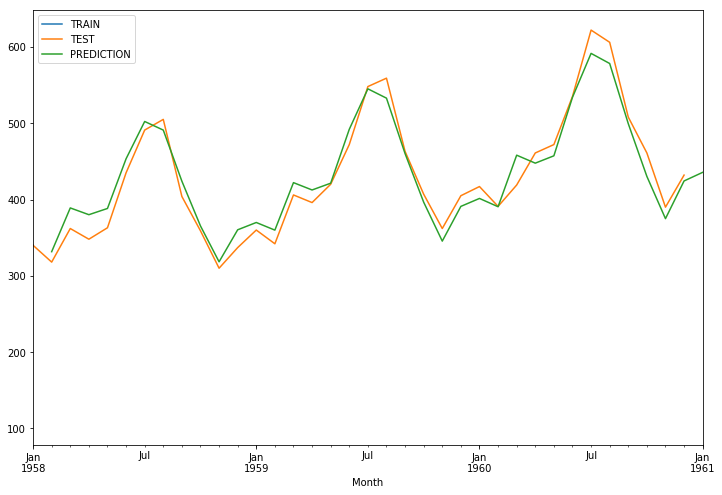

In [26]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12, 8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST', figsize=(12, 8))
test_predictions.plot(legend=True, label='PREDICTION', figsize=(12, 8), xlim=['1958-01-01', '1961-01-01'])